In [53]:
import numpy as np
from dgp import dgp
from kernel_class import kernel
from kernel_class import combine
import linkgp
from emulation import emulator
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS

from eval_functions_28Apr2022 import *

In [54]:
d = 2
f = camel_3h

x_lb = np.zeros((d,1))
x_ub = np.ones((d,1))

xlimits = np.hstack((x_lb,x_ub))

N_predict = 50

n = 20
layer1 = []   
for _ in range(d):
    layer1.append(kernel(length=np.array([1]),name='sexp',nugget_est=True))
layer2 = [kernel(length=np.array([1]),name='sexp',nugget_est=True,connect = np.arange(d))]
all_layer_init=combine(layer1,layer2)

seed = 0
np.random.seed(seed) 
lhs_sampling = LHS(xlimits = xlimits,random_state = seed, criterion = 'maximin')
x_lhs = lhs_sampling(n)
y_lhs = f(x_lhs).reshape(-1,1)

total_reps = 1

y_pred = np.zeros((n,total_reps))
for loocv in range(n):
        x = np.delete(x_lhs,loocv,axis =0)
        y = np.delete(y_lhs,loocv,axis =0)
        
        print("LOOCV ",loocv)
        xx = x_lhs[loocv,:]
        y_true = y_lhs[loocv,:]
        for reps in range(total_reps):
            print('Rep number ',reps)
            all_layer = all_layer_init 

            y_std = np.std(y)

            y = y/y_std
            
            x = x.reshape(-1,d)
            y = y.reshape(-1,1)

            np.random.seed(reps*23)  

            model=dgp(x,[y],1000*loocv+2*reps,all_layer = all_layer,check_rep = False)


            model.initialize(seed = 1000*loocv+2*reps)
            model.train(N=500,disable = False)
            all_layer=model.estimate()

            emu=emulator(all_layer,N=N_predict,nb_parallel = True)

            np.random.seed(1000*loocv+2*reps) 

            #res = emu.ppredict(x=np.reshape(xx,(-1,d)), sample_size=1, method='mean_var',chunk_num = 28,core_num = 28)
            res = emu.ppredict(x=np.reshape(xx,(-1,d)), sample_size=1, method='mean_var',chunk_num = 27,core_num = 27)

            mu_all = np.transpose(np.array(res[2]))
            
            y_pred[loocv,reps] = np.mean(mu_all)*y_std
            # print(mu_all)

LOOCV  0
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:11<00:00, 44.55it/s]


LOOCV  1
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:11<00:00, 41.97it/s]


LOOCV  2
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 31.62it/s]


LOOCV  3
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:16<00:00, 30.27it/s]


LOOCV  4
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 32.16it/s]


LOOCV  5
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:16<00:00, 30.85it/s]


LOOCV  6
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 31.59it/s]


LOOCV  7
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 33.09it/s]


LOOCV  8
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 31.77it/s]


LOOCV  9
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 31.31it/s]


LOOCV  10
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:16<00:00, 31.17it/s]


LOOCV  11
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 32.01it/s]


LOOCV  12
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:16<00:00, 31.04it/s]


LOOCV  13
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:16<00:00, 30.98it/s]


LOOCV  14
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 31.26it/s]


LOOCV  15
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:16<00:00, 31.01it/s]


LOOCV  16
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 32.59it/s]


LOOCV  17
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:10<00:00, 46.42it/s]


LOOCV  18
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:12<00:00, 41.33it/s]


LOOCV  19
Rep number  0


Iteration 500: Layer 2: 100%|██████████| 500/500 [00:15<00:00, 33.11it/s]


(0.0, 1500.0)

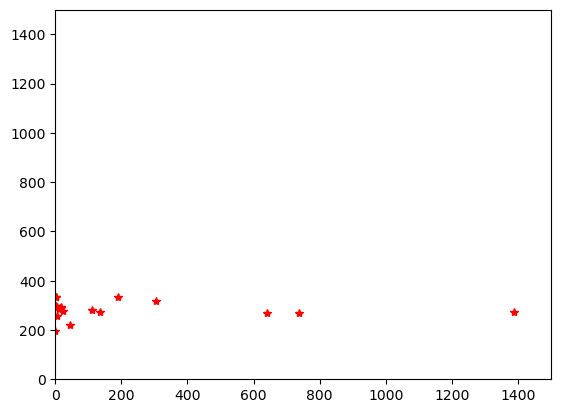

In [58]:
plt.plot(y_lhs,y_pred,'r*')
plt.xlim([0,1500])
plt.ylim([0,1500])